In [1]:
# import statements
import os
from pymongo import MongoClient
import bson
import pickle
from datetime import datetime, timedelta
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [20]:
!wget https://github.com/CS639-Data-Management-for-Data-Science/s25/raw/main/p2/sample_mflix.zip
!unzip sample_mflix.zip

--2025-02-24 22:38:46--  https://github.com/CS639-Data-Management-for-Data-Science/s25/raw/main/p2/sample_mflix.zip
Resolving github.com (github.com)... 140.82.113.3
connected. to github.com (github.com)|140.82.113.3|:443... 
302 Foundest sent, awaiting response... 
Location: https://raw.githubusercontent.com/CS639-Data-Management-for-Data-Science/s25/main/p2/sample_mflix.zip [following]
--2025-02-24 22:38:46--  https://raw.githubusercontent.com/CS639-Data-Management-for-Data-Science/s25/main/p2/sample_mflix.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15539889 (15M) [application/zip]
Saving to: ‘sample_mflix.zip’

sample_mflix.zip    100%[===================>]  14.82M  --.-KB/s    in 0.1s    

2025-02-24 22:38:47 (114 MB/s) - ‘sample_mflix.zip’ saved

In [2]:
# establish connection
client = MongoClient('mongodb://localhost:27017/')
db = client.sample_mflix

In [3]:
# load JSON
json_dir = "sample_mflix"
json_files = [f for f in os.listdir(json_dir) if f.endswith(".json")]
collections = [f.replace(".json","") for f in json_files]
collections

['comments', 'theaters', 'sessions', 'movies', 'users']

In [3]:
for idx, json_file in enumerate(json_files):
    with open(os.path.join(json_dir, json_file),"r") as f:
        for line in f:
            data = bson.json_util.loads(line.strip())
            db[collections[idx]].insert_one(data)
        print(f"Loaded {json_file} into the {collections[idx]} collection.")

NameError: name 'json_files' is not defined

In [3]:
db.list_collection_names()

['movies', 'users', 'theaters', 'comments', 'sessions']

In [5]:
list(db.users.find().limit(5))

[{'_id': ObjectId('59b99db4cfa9a34dcd7885b6'),
  'name': 'Ned Stark',
  'email': 'sean_bean@gameofthron.es',
  'password': '$2b$12$UREFwsRUoyF0CRqGNK0LzO0HM/jLhgUCNNIJ9RJAqMUQ74crlJ1Vu'},
 {'_id': ObjectId('59b99db4cfa9a34dcd7885b7'),
  'name': 'Robert Baratheon',
  'email': 'mark_addy@gameofthron.es',
  'password': '$2b$12$yGqxLG9LZpXA2xVDhuPnSOZd.VURVkz7wgOLY3pnO0s7u2S1ZO32y'},
 {'_id': ObjectId('59b99db5cfa9a34dcd7885b8'),
  'name': 'Jaime Lannister',
  'email': 'nikolaj_coster-waldau@gameofthron.es',
  'password': '$2b$12$6vz7wiwO.EI5Rilvq1zUc./9480gb1uPtXcahDxIadgyC3PS8XCUK'},
 {'_id': ObjectId('59b99db5cfa9a34dcd7885b9'),
  'name': 'Catelyn Stark',
  'email': 'michelle_fairley@gameofthron.es',
  'password': '$2b$12$fiaTH5Sh1zKNFX2i/FTEreWGjxoJxvmV7XL.qlfqCr8CwOxK.mZWS'},
 {'_id': ObjectId('59b99db6cfa9a34dcd7885ba'),
  'name': 'Cersei Lannister',
  'email': 'lena_headey@gameofthron.es',
  'password': '$2b$12$FExjgr7CLhNCa.oUsB9seub8mqcHzkJCFZ8heMc8CeIKOZfeTKP8m'}]

# Section 1: Basic MQL operations #

### Q1: Find the first movie in the movies collection. ###

In [5]:
#q1
q1 = db.movies.find_one({})
with open('answers/q1.pkl', 'wb') as f:
   pickle.dump(q1, f)
q1

{'_id': ObjectId('573a1390f29313caabcd4135'),
 'plot': 'Three men hammer on an anvil and pass a bottle of beer around.',
 'genres': ['Short'],
 'runtime': 1,
 'cast': ['Charles Kayser', 'John Ott'],
 'num_mflix_comments': 1,
 'title': 'Blacksmith Scene',
 'fullplot': 'A stationary camera looks at a large anvil with a blacksmith behind it and one on either side. The smith in the middle draws a heated metal rod from the fire, places it on the anvil, and all three begin a rhythmic hammering. After several blows, the metal goes back in the fire. One smith pulls out a bottle of beer, and they each take a swig. Then, out comes the glowing metal and the hammering resumes.',
 'countries': ['USA'],
 'released': datetime.datetime(1893, 5, 9, 0, 0),
 'directors': ['William K.L. Dickson'],
 'rated': 'UNRATED',
 'awards': {'wins': 1, 'nominations': 0, 'text': '1 win.'},
 'lastupdated': '2015-08-26 00:03:50.133000000',
 'year': 1893,
 'imdb': {'rating': 6.2, 'votes': 1189, 'id': 5},
 'type': 'movie'

### Q2: Find all movies directed by "Christopher Nolan". ###

In [6]:
#q2
q2 = list(db.movies.find({
    "directors": {"$eq": ["Christopher Nolan"]}
} 
))
with open('answers/q2.pkl', 'wb') as f:
   pickle.dump(q2, f)
q2[:1]

[{'_id': ObjectId('573a139df29313caabcf8dd4'),
  'fullplot': "An older man listens to Bill's story about being a callow writer who likes to follow strangers around London, observing them. One day, a glib and self-confident man whom Bill has been following confronts him. He's Cobb, a burglar who takes Bill under his wing and shows him how to break and enter. They burgle a woman's flat; Bill gets intrigued with her (photographs are everywhere in her flat). He follows her and chats her up at a bar owned by her ex-boyfriend, a nasty piece of work who killed someone in her living room with a hammer. Soon Bill is volunteering to do her a favor, which involves a break-in. What does the older man know that Bill doesn't?",
  'imdb': {'rating': 7.6, 'votes': 59767, 'id': 154506},
  'year': 1998,
  'plot': 'A young writer who follows strangers for material meets a thief who takes him under his wing.',
  'genres': ['Mystery', 'Thriller'],
  'rated': 'R',
  'metacritic': 60,
  'title': 'Following',

### Q3: Find the first 5 users in the users collection. ###

In [7]:
#q3
q3 = list(db.users.find({
} 
).limit(5))
with open('answers/q3.pkl', 'wb') as f:
   pickle.dump(q3, f)
q3[:3]

[{'_id': ObjectId('59b99db4cfa9a34dcd7885b6'),
  'name': 'Ned Stark',
  'email': 'sean_bean@gameofthron.es',
  'password': '$2b$12$UREFwsRUoyF0CRqGNK0LzO0HM/jLhgUCNNIJ9RJAqMUQ74crlJ1Vu'},
 {'_id': ObjectId('59b99db4cfa9a34dcd7885b7'),
  'name': 'Robert Baratheon',
  'email': 'mark_addy@gameofthron.es',
  'password': '$2b$12$yGqxLG9LZpXA2xVDhuPnSOZd.VURVkz7wgOLY3pnO0s7u2S1ZO32y'},
 {'_id': ObjectId('59b99db5cfa9a34dcd7885b8'),
  'name': 'Jaime Lannister',
  'email': 'nikolaj_coster-waldau@gameofthron.es',
  'password': '$2b$12$6vz7wiwO.EI5Rilvq1zUc./9480gb1uPtXcahDxIadgyC3PS8XCUK'}]

### Q4: Find the first movie with an IMDb rating greater than 9. ###

In [123]:
#q4
q4 = db.movies.find_one({
    "imdb.rating" : {"$gt" : 9 }
} 
)
with open('answers/q4.pkl', 'wb') as f:
   pickle.dump(q4, f)
q4

{'_id': ObjectId('573a1396f29313caabce4a9a'),
 'fullplot': 'When the aging head of a famous crime family decides to transfer his position to one of his subalterns, a series of unfortunate events start happening to the family, and a war begins between all the well-known families leading to insolence, deportation, murder and revenge, and ends with the favorable successor being finally chosen.',
 'imdb': {'rating': 9.2, 'votes': 1038358, 'id': 68646},
 'year': 1972,
 'plot': 'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.',
 'genres': ['Crime', 'Drama'],
 'rated': 'R',
 'metacritic': 100,
 'title': 'The Godfather',
 'lastupdated': '2015-09-02 00:08:23.680000000',
 'languages': ['English', 'Italian', 'Latin'],
 'writers': ['Mario Puzo (screenplay)',
  'Francis Ford Coppola (screenplay)',
  'Mario Puzo (novel)'],
 'type': 'movie',
 'tomatoes': {'website': 'http://www.thegodfather.com',
  'viewer': {'rating': 4.4, 'numRevie

### Q5: Count the number of movies in the movies collection. ###

In [15]:
#q5
q5 = db.movies.count_documents({})
with open('answers/q5.pkl', 'wb') as f:
   pickle.dump(q5, f)
q5

23539

### Q6: Count the number of movies released after the year 2000. ###

In [17]:
#q6
q6 = db.movies.count_documents({
        "year": {"$gt": 2000}
})
with open('answers/q6.pkl', 'wb') as f:
   pickle.dump(q6, f)
q6

13103

### Q7: Count the number of movies in the "Comedy" genre. ###

In [26]:
#q7
q7 = db.movies.count_documents({
        "genres": {"$in": ["Comedy"]}
})
with open('answers/q7.pkl', 'wb') as f:
   pickle.dump(q7, f)
q7

7024

### Q8: Count the number of comments made by the user "Taylor Hill". ###

In [33]:
#q8
q8 = db.comments.count_documents({
        "name": {"$in": ["Taylor Hill"]}
})
with open('answers/q8.pkl', 'wb') as f:
   pickle.dump(q8, f)
q8

279

### Q9: Count the number of movies with a runtime greater than 120 minutes. ###

In [36]:
#q9
q9 = db.movies.count_documents({
        "runtime": {"$gt": 120}
})
with open('answers/q9.pkl', 'wb') as f:
   pickle.dump(q9, f)
q9

3722

### Q10: Find all movies released in year 2015. ###

In [58]:
#q10
q10 = list(db.movies.find({
        "year": {"$eq": 2015}
},{"title":1,"_id":0}).sort("title",1))
with open('answers/q10.pkl', 'wb') as f:
   pickle.dump(q10, f)
q10[-3:]

[{'title': 'Youth'}, {'title': 'Z for Zachariah'}, {'title': 'Zurich'}]

### Q11: Find the top 5 most recent comments. ###

In [69]:
#q11
q11 = list(db.comments.find({

}).sort("date", -1).limit(5))
with open('answers/q11.pkl', 'wb') as f:
   pickle.dump(q11, f)
q11[-3:]

[{'_id': ObjectId('5b7326fd4a68c3f7a7bcb188'),
  'name': 'yznjm1yul',
  'email': 'rio72go4u@wztfh.ep0',
  'movie_id': ObjectId('573a13eff29313caabdd82f3'),
  'text': 'feefee',
  'date': datetime.datetime(2018, 8, 14, 15, 1, 16, 716000)},
 {'_id': ObjectId('5b7326bd4a68c3f7a7bcb15f'),
  'name': 'sg1u6swo4',
  'email': 'gs4jr54ar@6gvpw.ok0',
  'movie_id': ObjectId('573a13eff29313caabdd82f3'),
  'text': 'fazzlebizzle',
  'date': datetime.datetime(2018, 8, 14, 15, 0, 25, 211000)},
 {'_id': ObjectId('5b7325024a68c3f7a7bcb123'),
  'name': 'g7pnd0yy2',
  'email': 'afobv6jhf@c9e0o.lb0',
  'movie_id': ObjectId('573a13eff29313caabdd82f3'),
  'text': 'fazzlebizzle',
  'date': datetime.datetime(2018, 8, 14, 14, 53, 11, 550000)}]

### Q12: Count the number of movies with both "Action" and "Adventure" as genres. ###

In [78]:
#q12
q12 = db.movies.count_documents({
    "genres": {"$all": ["Action", "Adventure"]}
})
with open('answers/q12.pkl', 'wb') as f:
   pickle.dump(q12, f)
q12

779

### Q13: Find all movies with an IMDb rating between 9 and 10. ###

In [80]:
#q13
q13 = list(db.movies.find({
    "imdb.rating": {
        "$gte": 9,
        "$lte": 10
    
    }
},{"title":1,"imdb.rating":1,"genres":1,"year":1,"_id":0}))
with open('answers/q13.pkl', 'wb') as f:
   pickle.dump(q13, f)
q13[:3]

[{'imdb': {'rating': 9.2},
  'year': 1972,
  'genres': ['Crime', 'Drama'],
  'title': 'The Godfather'},
 {'imdb': {'rating': 9.1},
  'year': 1974,
  'genres': ['Crime', 'Drama'],
  'title': 'The Godfather: Part II'},
 {'genres': ['Drama', 'History'],
  'title': 'I, Claudius',
  'year': 1976,
  'imdb': {'rating': 9}}]

### Q14: Count the number of movies with exactly 3 directors. ###

In [82]:
#q14
q14 = db.movies.count_documents({
        "directors": {
                "$size": 3
        }
    
})
with open('answers/q14.pkl', 'wb') as f:
   pickle.dump(q14, f)
q14

181

### Q15: Count the number of movies with at least 3 directors. ###

In [95]:
#q15
q15 = db.movies.count_documents({
    "$expr": {
        "$gte": [
            { "$size": { "$ifNull": ["$directors", []] } }, 3
        ]
    }
})
with open('answers/q15.pkl', 'wb') as f:
   pickle.dump(q15, f)
q15

296

### Q16: Find the total number of comments made on movies released in 2010. ###

In [115]:
#q16

movies_2010 = list(db.movies.find({
        "year": {
            "$eq": 2010
        }    
},{"_id":1}))


all_ids = [idx["_id"] for idx in movies_2010]
    

q16 = db.comments.count_documents({
    "movie_id": {
        "$in": all_ids
    }
})
with open('answers/q16.pkl', 'wb') as f:
   pickle.dump(q16, f)
q16

510

### Q17: Find all unique users who have commented on "Action" movies. ###

In [8]:
#q17

movies_action = list(db.movies.find({
        "genres": {
            "$in": ["Action"]
        }    
},{"_id":1}))

all_action_ids = [movie["_id"] for movie in movies_action]
    

q17 = sorted(list(db.comments.distinct("name",{
    "movie_id": {
        "$in": all_action_ids
    }
})))
with open('answers/q17.pkl', 'wb') as f:
   pickle.dump(q17, f)
q17[-3:]

['Ygritte', 'Yolanda Owen', 'Yvette Roth']

### Q18: Find all comments made on or after August 13th, 2018. ###

In [13]:
#q18
Aug_13 = datetime(2018,8,13)

q18 = list(db.comments.find({
        "date": {
                "$gte":  Aug_13           
        }
}))
with open('answers/q18.pkl', 'wb') as f:
    pickle.dump(q18,f)
q18[:3]

[{'_id': ObjectId('5b71c2884a68c30929b2a9f1'),
  'name': 'bbw6dadfe',
  'email': '7o9jvpos7@zmu2t.koi',
  'movie_id': ObjectId('573a13eff29313caabdd82f3'),
  'text': 'fazzlebizzle',
  'date': datetime.datetime(2018, 8, 13, 13, 40, 29, 394000)},
 {'_id': ObjectId('5b71c8444a68c315a80b046a'),
  'name': 'ztcviee3w',
  'email': 'k5s0qzhgq@bura0.b9j',
  'movie_id': ObjectId('573a13eff29313caabdd82f3'),
  'text': 'fazzlebizzle',
  'date': datetime.datetime(2018, 8, 13, 14, 4, 57, 526000)},
 {'_id': ObjectId('5b721c0020a32767b53b0ef0'),
  'name': 'y5uve0uql',
  'email': '7ba24unv0@f93ng.s96',
  'movie_id': ObjectId('573a13eff29313caabdd82f3'),
  'text': 'fazzlebizzle',
  'date': datetime.datetime(2018, 8, 13, 20, 2, 12, 67000)}]

### Q19: Count the total number of comments made on movies directed by "Steven Spielberg". ###

In [21]:
#q19
steven = list(db.movies.find({
            "directors": {
                "$in": ["Steven Spielberg"]
            }
},{"_id":1}))

all_id = [idx["_id"] for idx in steven]
q19 = db.comments.count_documents({
        "movie_id" : {
            "$in": all_id
        }
    
})
with open('answers/q19.pkl', 'wb') as f:
    pickle.dump(q19,f)
q19

1269

### Q20: Find the 10 most recent movies with an IMDb rating greater than 9.0. ###

In [30]:
#q20

q20 = list(db.movies.find({
    "imdb.rating": {"$gt": 9}
},{"title":1,"released":1,"imdb.rating":1,"_id":0}).sort("released",-1).limit(10))
with open('answers/q20.pkl','wb') as f:
    pickle.dump(q20,f)
q20

[{'title': 'A Brave Heart: The Lizzie Velasquez Story',
  'released': datetime.datetime(2015, 9, 25, 0, 0),
  'imdb': {'rating': 9.4}},
 {'title': 'The Real Miyagi',
  'released': datetime.datetime(2015, 2, 20, 0, 0),
  'imdb': {'rating': 9.3}},
 {'title': 'Over the Garden Wall',
  'released': datetime.datetime(2014, 11, 3, 0, 0),
  'imdb': {'rating': 9.2}},
 {'title': 'Frozen Planet',
  'released': datetime.datetime(2012, 3, 18, 0, 0),
  'imdb': {'rating': 9.2}},
 {'title': 'Human Planet',
  'released': datetime.datetime(2011, 1, 13, 0, 0),
  'imdb': {'rating': 9.2}},
 {'title': 'Life',
  'released': datetime.datetime(2009, 10, 12, 0, 0),
  'imdb': {'rating': 9.2}},
 {'title': 'Planet Earth',
  'released': datetime.datetime(2007, 3, 25, 0, 0),
  'imdb': {'rating': 9.5}},
 {'title': 'The Blue Planet',
  'released': datetime.datetime(2002, 1, 27, 0, 0),
  'imdb': {'rating': 9.2}},
 {'title': 'Band of Brothers',
  'released': datetime.datetime(2001, 9, 9, 0, 0),
  'imdb': {'rating': 9.6}

# Section 2: Medium MQL operations #

### Q21: Find the total number of movies that have no comments. ###

In [13]:
#q21 
commented_movies = list(db.comments.distinct("movie_id"))

q21 = db.movies.count_documents({
    "_id": {
        "$nin": commented_movies
    }
})
with open("answers/q21.pkl","wb") as f:
    pickle.dump(q21,f)
q21

16090

### Q22: Find the total number of movies where the title starts with "The". ###

In [16]:
#q22
q22 = db.movies.count_documents({
    "title": { 
        "$regex": "^The"
    }
})
with open("answers/q22.pkl","wb") as f:
    pickle.dump(q22,f)

q22

4477

### Q23: Find the average IMDb rating of all "Action" movies. ###

In [24]:
#q23
pipe = [
    {"$match": {
        "genres" : {
            "$in" : ["Action"] 
        }
    }
    },
    {"$group":{
        "_id": None,
        "average_rating": {
            "$avg": "$imdb.rating"
        }
        
    }},
    {"$project":{
        "_id":0,
        "average_rating": {
            "$round": ["$average_rating",2]
        }
    }}
    
]
q23 = list(db.movies.aggregate(pipe))
with open("answers/q23.pkl", "wb") as f:
    pickle.dump(q23,f)

q23

[{'average_rating': 6.38}]

### Q24: Find the top 5 users who have made the most comments. ###

In [36]:
#q24
pipe = [
    {"$group":{
        "_id": "$name",
        "total_comments":{
            "$sum": 1
        }
    }
    },
    {"$sort": {"total_comments": -1, "_id":1}},
    {"$limit": 5
    }
]
q24= list(db.comments.aggregate(pipe))
with open("answers/q24.pkl", "wb") as f:
    pickle.dump(q24,f)
q24

[{'_id': 'Mace Tyrell', 'total_comments': 331},
 {'_id': 'Missandei', 'total_comments': 327},
 {'_id': 'The High Sparrow', 'total_comments': 315},
 {'_id': 'Sansa Stark', 'total_comments': 308},
 {'_id': 'Rodrik Cassel', 'total_comments': 305}]

### Q25: Find the 5 most commented movies in the database. ###

In [41]:
#q25

pipe = [
    {"$group":{
        "_id": "$movie_id",
        "total_comments": {
            "$sum": 1
            
        }
    }
    
    },{"$lookup":{
        "from": "movies",
        "localField": "_id",
        "foreignField": "_id",
        "as" : "movie"      
        
    }
        
    },{"$unwind": "$movie"
        
    },{"$sort":{
        "total_comments": -1, "movie.title": 1
    }},
    {"$limit":5},
    {"$project":{
        "_id": 1,
        "total_comments" :1
    }}
]
q25= list(db.comments.aggregate(pipe))
with open("answers/q25.pkl", "wb") as f:
    pickle.dump(q25,f)
q25

[{'_id': ObjectId('573a13bff29313caabd5e91e'), 'total_comments': 161},
 {'_id': ObjectId('573a13abf29313caabd25582'), 'total_comments': 158},
 {'_id': ObjectId('573a13a5f29313caabd159a9'), 'total_comments': 158},
 {'_id': ObjectId('573a13a3f29313caabd0d1e3'), 'total_comments': 158},
 {'_id': ObjectId('573a13b3f29313caabd3b647'), 'total_comments': 158}]

# Section 3: Hard MQL commands #

### Q26: Find the average runtime of all movies in the "Sci-Fi" genre. ###

In [44]:
#q26
pipe = [{"$match":{
    "genres": {"$in":["Sci-Fi"]}
}},
        {"$group":{
        "_id": None,
        "average_runtime":{
            "$avg": "$runtime"
        }
    }
    },
    {"$project":{
        "_id":0,
        "average_runtime": {
            "$round": ["$average_runtime",2]
        }
    }}
]
q26= list(db.movies.aggregate(pipe))
with open("answers/q26.pkl", "wb") as f:
    pickle.dump(q26,f)
q26

[{'average_runtime': 103.05}]

### Q27: Find the top 3 directors by the number of movies they directed. ###

In [52]:
#q27
pipe = [
    {"$unwind":
        "$directors"
    },{"$group":{
        "_id": "$directors",
        "count":{"$sum": 1}
    }},
    {"$sort": {
        "count": -1,
        "_id": 1
    }},{"$limit": 3}
    
]
q27= list(db.movies.aggregate(pipe))
with open("answers/q27.pkl", "wb") as f:
    pickle.dump(q27,f)
q27

[{'_id': 'Woody Allen', 'count': 40},
 {'_id': 'John Ford', 'count': 35},
 {'_id': 'John Huston', 'count': 34}]

### Q28: Find the top 5 most active users (based on the number of comments). ###

In [70]:
#q28
pipe = [{"$group":{
        "_id": "$email",
        "comment_count":{
            "$sum": 1
        }
    }}
    ,{"$project": {
        "_id": 0,
        "email": "$_id",
        "comment_count": 1
    }},
    {"$sort": {"comment_count": -1}},
    {"$limit": 5
    }]
q28= list(db.comments.aggregate(pipe))
with open("answers/q28.pkl", "wb") as f:
    pickle.dump(q28,f)
q28

[{'comment_count': 331, 'email': 'roger_ashton-griffiths@gameofthron.es'},
 {'comment_count': 327, 'email': 'nathalie_emmanuel@gameofthron.es'},
 {'comment_count': 315, 'email': 'jonathan_pryce@gameofthron.es'},
 {'comment_count': 308, 'email': 'sophie_turner@gameofthron.es'},
 {'comment_count': 305, 'email': 'ron_donachie@gameofthron.es'}]

### Q29: Find the average IMDb rating for each genre and list the top 5 genres with the highest average rating. ###

In [82]:
#q29
pipe = [{"$unwind":
        "$genres"},
    {"$group":{
        "_id": "$genres",
        "average_rating": {
            "$avg": "$imdb.rating"
        }
        
    }},
    {"$project":{
        "_id":1,
        "average_rating": {
            "$round": ["$average_rating",2]
        }
    }},
    {"$sort": {
        "average_rating": -1
    }},{"$limit": 5}
    
]
q29 = list(db.movies.aggregate(pipe))
with open("answers/q29.pkl", "wb") as f:
    pickle.dump(q29,f)

q29

[{'_id': 'Film-Noir', 'average_rating': 7.5},
 {'_id': 'Documentary', 'average_rating': 7.37},
 {'_id': 'Short', 'average_rating': 7.36},
 {'_id': 'News', 'average_rating': 7.25},
 {'_id': 'History', 'average_rating': 7.2}]

### Q30: Find all users who have commented on both "Action" and "Drama" movies. ###

In [92]:
#q30
pipe = [

    {"$lookup": {
        "from": "movies",
        "localField": "movie_id",
        "foreignField": "_id",
        "as": "movie"
    }},
    {"$unwind": "$movie"},
    {"$unwind": "$movie.genres"},
    {"$group": {
        "_id":"$name",
        "genres_commented": {
            "$addToSet": "$movie.genres"
        }
    }},
    {"$match":{
        "genres_commented": {
            "$all": ["Action","Drama"]
        }
    }},{"$project": {
        "_id": 1
    }},{"$sort": {
        "_id": 1
    }}
]


q30 = list(db.comments.aggregate(pipe))
with open("answers/q30.pkl", "wb") as f:
    pickle.dump(q30,f)
q30[:3]

[{'_id': 'Alliser Thorne'}, {'_id': 'Amy Phillips'}, {'_id': 'Amy Ramirez'}]

### Q31: Find the user who commented on the most distinct movies (i.e., most distinct movie_ids). ###

In [97]:
#q31 

pipe= [
    {"$group":{
        "_id": "$name",
        "unique_movies" : {
            "$addToSet": "$movie_id"
        }
    }}, {"$project": {
        "_id": 1,
        "unique_movies": {
            "$size": "$unique_movies"
            
        }
    }},
    {"$sort":{
        "unique_movies": -1
    }},
    {"$limit": 1}
    
]
q31 = list(db.comments.aggregate(pipe))
with open("answers/q31.pkl", "wb") as f:
    pickle.dump(q31,f)
q31

[{'_id': 'Mace Tyrell', 'unique_movies': 270}]

#  Section 4: GeoJSON #

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Function to plot theaters on a map
def plot_theaters(theaters, map_type, filename):
    assert map_type in ['wi', 'madison']
    assert filename in ['q32', 'q33', 'q34']
    
    # Convert theater coordinates to a GeoDataFrame
    gdf = gpd.GeoDataFrame(theaters, geometry=gpd.points_from_xy(
        [theater['location']['geo']['coordinates'][0] for theater in theaters],
        [theater['location']['geo']['coordinates'][1] for theater in theaters]
    ))

    world = gpd.read_file("wi_limits.geojson")
    if map_type == 'madison':
        world = gpd.read_file("madison_limits.geojson")
    gdf = gdf.set_crs(world.crs)
    
    # Plot
    ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')
    gdf.plot(ax=ax, marker='o', color='red', markersize=5)
    plt.title("Theater Locations")

    plt.grid(True)
    plt.savefig(f'{filename}.png')
    plt.show()

### Q32: Find all theaters located in Wisconsin (WI) and plot them on a map of WI. ###

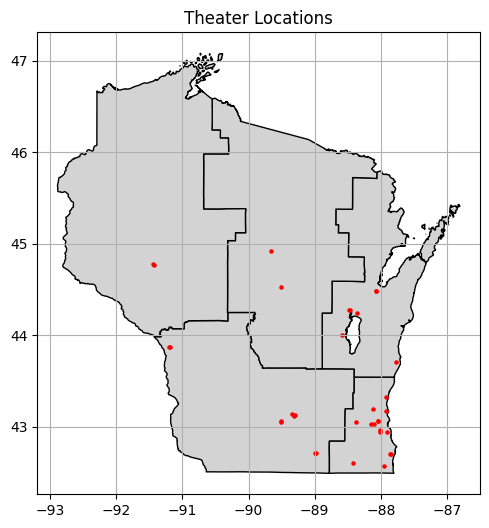

In [12]:
#q32
theaters = list(db.theaters.find({"location.address.state": "WI"}))
plot_theaters(theaters, map_type = "wi", filename = "q32")


### Q33: Find the top 2 theaters nearest to the Peninsula State Park and plot them on a map of WI. ###

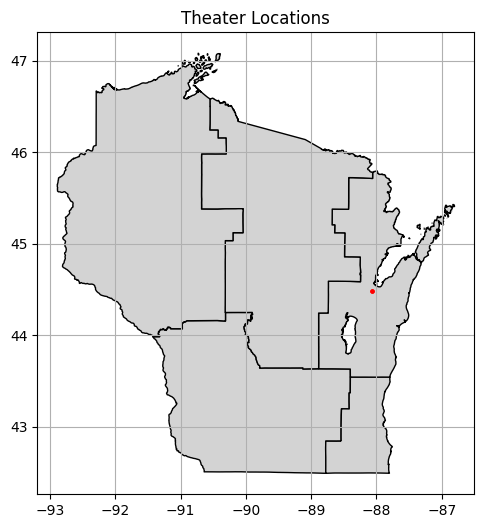

[{'_id': ObjectId('59a47287cfa9a3a73e51e9b1'),
  'theaterId': 2735,
  'location': {'address': {'street1': '639 Bay Park Square',
    'city': 'Green Bay',
    'state': 'WI',
    'zipcode': '54304'},
   'geo': {'type': 'Point', 'coordinates': [-88.067962, 44.484684]}}},
 {'_id': ObjectId('59a47287cfa9a3a73e51ea40'),
  'theaterId': 28,
  'location': {'address': {'street1': '825 Pilgrim Way',
    'street2': 'Ste A',
    'city': 'Green Bay',
    'state': 'WI',
    'zipcode': '54304'},
   'geo': {'type': 'Point', 'coordinates': [-88.06794, 44.481197]}}}]

In [23]:
#q33
coordinates =[-87.22109, 45.15602]  
db.theaters.create_index({"location.geo": "2dsphere"})
nearest_theaters = list(db.theaters.find({
    "location.geo": {
        "$near": {
            "$geometry":{
                "type": "Point",
                "coordinates": coordinates
            }
        }
    }
},limit = 2))
plot_theaters(nearest_theaters, map_type="wi", filename="q33")
# check there is actually 2 there
nearest_theaters

### Q34: Find theaters within 10 miles of the UW-Madison and plot them on a map of Madison. ###


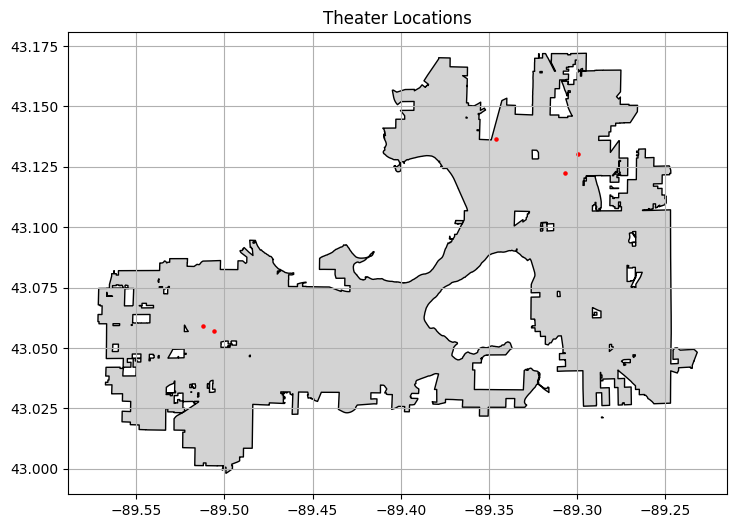

In [21]:
#q34
uw_coordinates = [-89.40816, 43.07540]  
db.theaters.create_index({"location.geo": "2dsphere"})
miles_to_meters = 10 * 1609.34
uw_theaters = list(db.theaters.find({
    "location.geo": {
        "$near": {
            "$geometry":{
                "type": "Point",
                "coordinates": uw_coordinates
            },"$maxDistance" : miles_to_meters
        }
    }
}))
plot_theaters(uw_theaters, map_type="madison", filename="q34")

In [22]:
!pytest --no-header -vv autograder.py

============================= test session starts ==============================
collected 39 items                                                             

PASSED                                   [  2%]
PASSED                                       [  5%]
autograder.py::test_mongodb_connection PASSED                            [  7%]
autograder.py::test_load_files_to_mongo PASSED                           [ 10%]
autograder.py::test_question_comments PASSED                             [ 12%]
autograder.py::test_numeric_match[5] PASSED (0.1/0.1)                    [ 15%]
autograder.py::test_numeric_match[6] PASSED (0.1/0.1)                    [ 17%]
autograder.py::test_numeric_match[7] PASSED (0.1/0.1)                    [ 20%]
autograder.py::test_numeric_match[8] PASSED (0.1/0.1)                    [ 23%]
autograder.py::test_numeric_match[9] PASSED (0.1/0.1)                    [ 25%]
autograder.py::test_numeric_match[12] PASSED (0.1/0.1)                   [ 28%]
autograder.py::tes